# Центральная предельная теорема своими руками

>> **Рекомендации по выполнению:**
1. Дайте ссылки на статью на Wiki с выбранным вами распределением
2. Укажите формулы для расчёта теоретических мат ожидания и дисперсии исходного распределения (по возможности в LaTex формате), ниже проведите расчёты в python.
3. Не используйте numpy.std и numpy.mean! См. пункт 2.
4. Выполните расчёты мат ожидания и дисперсии средневыборочных в отдельной ячейке для всех n. Приведите формулы.
5. Используйте только латинские символы в названии ноутбука. Хорошо - "week4.ipynb", плохо - "ЦПТ.ipynb". Иначе ваше задание будет недоступно для скачивания и вы получите 0 баллов.

>**1.** Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе)

In [161]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import expon
%matplotlib inline

## Экспоненциальное распределение $X\sim {\mathrm  {Exp}}(\lambda )$    
https://ru.wikipedia.org/wiki/Экспоненциальное_распределение

**Случайная величина** $X$ имеет экспоненциальное распределение с параметром $\lambda >0$, *если её* **плотность** *имеет вид*    $$ f_{X}(x)={\begin{cases}\lambda \,e^{-\lambda x},&x\geq 0,\\0,&x<0.\end{cases}}$$

**Математическое ожидание**	$$\lambda ^{-1}$$

**Дисперсия** $$\lambda ^{-2}$$

In [162]:
#Вычисление теоритических EX, std, DX  распределения (по умолчанию lambda = 1)
EX = expon.mean()
std = expon.std()
DX = std ** 2
print 'Теоретические:\n мат. ожидание = ' + str(EX) + '\n дисперсия = ' + str(DX)

Теоретические:
 мат. ожидание = 1.0
 дисперсия = 1.0


>**2.** Сгенерируйте выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

## Выборка объёма 1000, гистограмма, теоретическая плотность

In [163]:
# выборка объёма 1000
exp = expon.rvs(size=1000)

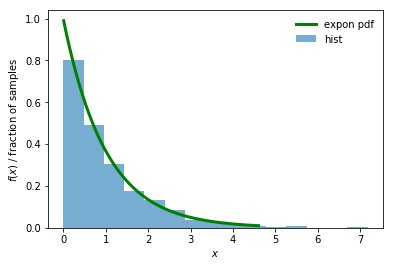

In [164]:
# построение гистограммы выборки и поверх неё теоретической плотности распределения случайной величины
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 1000)
ax.plot(x, expon.pdf(x),'g-', lw=3, label='expon pdf') 
ax.hist(exp, normed=True, histtype= 'stepfilled', bins=15, alpha=0.6, label='hist')
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
ax.legend(loc='best', frameon=False)
plt.show()

>**3.** Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения

## Значения параметров нормальных распределений, которыми, согласно ЦПТ, приближается распределение выборочных средних

In [165]:
# list n
n_sizes = [5,10,50]

**Из review criteria**

>выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;

>**Вычисление параметров нормального распределения** $$N\left(\mu ,\sigma ^{2}\right)$$    $\mu=EX$, $\sigma=\sqrt\frac{DX}{n}$

**Из рекомендаций**

>выполните расчёты мат ожидания и дисперсии средневыборочных в отдельной ячейке для всех n

In [166]:
# мат. ожидание и sigma нормального распределения для n = 5
mu_5 = EX
sigma_5 = math.sqrt(DX/n_sizes[0])
print 'Средневыборочные для n=5:\n мат. ожидание = ' + str(EX) + '\n дисперсия = ' + str(DX/n_sizes[0])

Средневыборочные для n=5:
 мат. ожидание = 1.0
 дисперсия = 0.2


In [167]:
# для n = 10
mu_10 = EX
sigma_10 = math.sqrt(DX/n_sizes[1])
print 'Средневыборочные для n=10:\n мат. ожидание = ' + str(EX) + '\n дисперсия = ' + str(DX/n_sizes[1])

Средневыборочные для n=10:
 мат. ожидание = 1.0
 дисперсия = 0.1


In [168]:
# для n = 50
mu_50 = EX
sigma_50 = math.sqrt(DX/n_sizes[2])
print 'Средневыборочные для n=50:\n мат. ожидание = ' + str(EX) + '\n дисперсия = ' + str(DX/n_sizes[2])

Средневыборочные для n=50:
 мат. ожидание = 1.0
 дисперсия = 0.02


## Построение гистограммы распределений выборочных средних и поверх каждой гистограммы плотность соответствующего нормального распределения

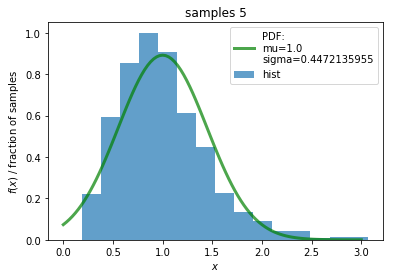

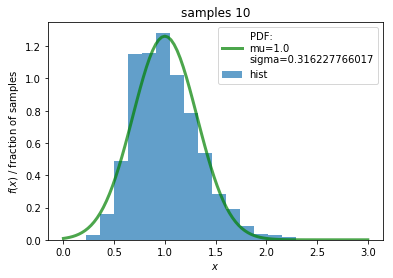

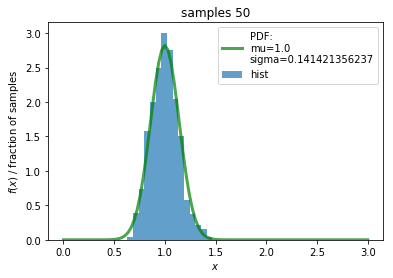

In [169]:
# построение гистограмм распределений их выборочных средних
# поверх каждой гистограммы плотность соответствующего нормального распределения

our_exp = sts.expon()
for n in n_sizes:
    # генерация выборок
    sample = np.array([our_exp.rvs(n) for _ in range(1000)])
    # вычисление выборочных средних
    mean_v = sample.mean(axis = 1)
    # построение гитограммы
    fig, ax = plt.subplots(1, 1)
    ax.hist(mean_v, normed=True, histtype = 'stepfilled', bins = 15, alpha=0.7, label='hist')
    
    # нормальное распределенние
    mu = EX
    sigma = math.sqrt(DX/n)
    norm_rv = sts.norm(mu, sigma)
    x = np.linspace(0.0,3.0,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'g-', lw=3, alpha=0.7, label=('PDF: \nmu=' + str(mu) + '\nsigma=' + str(sigma)))
    plt.title('samples ' + str(n))
    plt.ylabel('$f(x)$ / fraction of samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

**Из review criteria**

>выводы по результатам выполнения задания.

> **4.** Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Вывод

На графиках видно:
- С ростом значения n аппроксимация распределения выборочных средних нормальным улучшается;
- Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением ЦПТ.